<a href="https://colab.research.google.com/github/sjdoescoding/CE889/blob/main/CE889_Individual_Assignment_(might_be_working).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TODO
- Split Training and Test sets of the data 
- Gather a MSE for the predictions
- Connect the outputs to the game
- Optimize Parameters 
- Run the game 

In [ ]:
# Importing Libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Connecting Google Drive
# from zipfile import ZipFile
  
from google.colab import drive #mounting to drive
drive.mount('/content/drive', force_remount=True)


df = pd.read_csv('/content/drive/MyDrive/CE8889/ce889_dataCollection.csv')

Mounted at /content/drive


In [ ]:
df.head()

,X,Y,Z,O
0,222.139837,431.9,0.2,0.00
1,222.139837,431.7,0.3,0.04
2,222.099838,431.4,0.4,0.00
3,222.099838,431.0,0.5,0.04
4,222.059837,430.5,0.6,0.00


In [ ]:
df.columns

Index(['X', 'Y', 'Z', 'O '], dtype='object')

In [ ]:
df.rename(columns = {'X':'X_dist', 'Y':'Y_dist','Z':'X_vel','O ': 'Y_vel'}, inplace = True)

In [ ]:
df.shape

(16355, 4)

In [ ]:
df.columns

Index(['X_dist', 'Y_dist', 'X_vel', 'Y_vel'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16355 entries, 0 to 16354
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X_dist  16355 non-null  float64
 1   Y_dist  16355 non-null  float64
 2   X_vel   16355 non-null  float64
 3   Y_vel   16355 non-null  float64
dtypes: float64(4)
memory usage: 511.2 KB


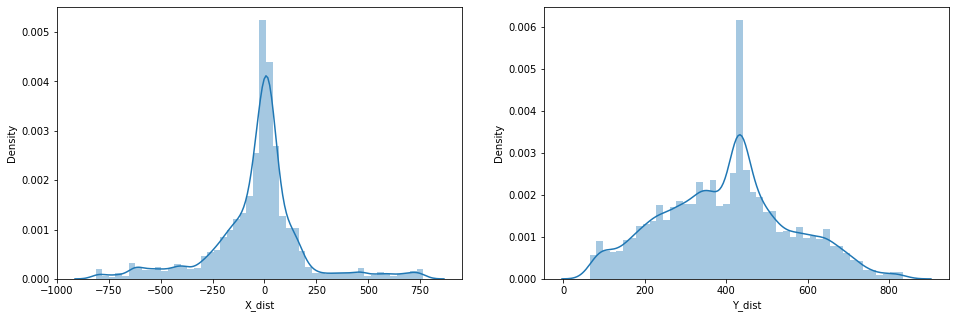

In [ ]:
# X & Y Distance Distributions
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['X_dist'])
plt.subplot(1,2,2)
sns.distplot(df['Y_dist'])
plt.show()
     

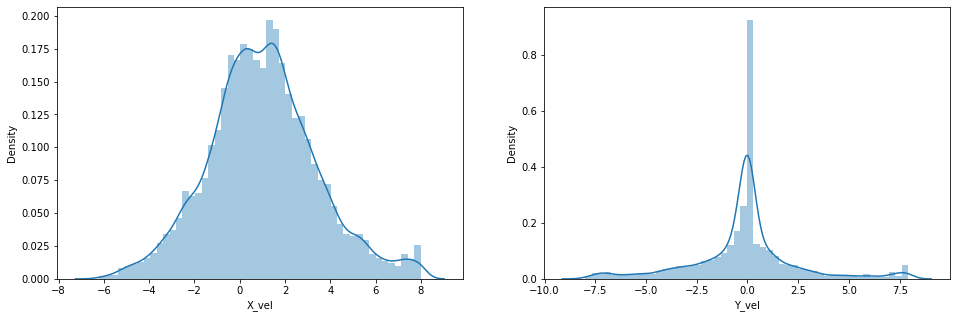

In [ ]:
# X & Y Velocity Distributions
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['X_vel'])
plt.subplot(1,2,2)
sns.distplot(df['Y_vel'])
plt.show()
    

In [ ]:

from sklearn import preprocessing

x = df['X_dist'].values.reshape(-1, 1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = x_scaled

# #Scaling and normalising test output 
y = df['Y_dist'].values.reshape(-1, 1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
y_scaled = min_max_scaler.fit_transform(y)
y = y_scaled

In [ ]:
X = np.squeeze(np.asarray(X))
y = np.squeeze(np.asarray(y))

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# #First training the model on distance input and gather distance output
# X = df['X_dist'].to_numpy().reshape(-1,1)
# y = df['Y_dist'].to_numpy().reshape(-1,1)
# # Scaling the dataset
# standardScale = StandardScaler()
# standardScale.fit_transform(X,y)

# # # Splitting the Data into Train and Test sets - 80:20 Split on the training and test set
# # X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 0)

In [ ]:
# from sklearn import preprocessing


# #Scaling and normalising train set
# x = train.values.reshape(-1, 1) #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# X = x_scaled

# # #Scaling and normalising test output 
# y = target.values.reshape(-1, 1) #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# y_scaled = min_max_scaler.fit_transform(y)
# y = x_scaled

#Neural Network

In [ ]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self.sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def learning(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self.sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self.sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )

    def training(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self.learning(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

In [ ]:
input_vectors = X
targets = y

learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.training(input_vectors, targets, 10000)

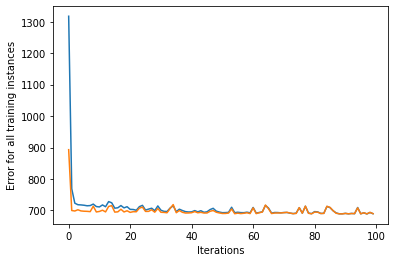

In [ ]:
# import matplotlib.pyplot as plt

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.savefig("cumulative_error.png")

In [ ]:
# input_vector = X_train, y_train

# targets = y_train

# learning_rate = 0.1

# neural_network = NeuralNetwork(learning_rate)

# training_error = neural_network.training(input_vector, targets, 10000)

# # neural_network.predict(input_vector)

In [ ]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_actual, y_predicted, squared=False)